# Natural Language Processing with Hotel Reviews

### Spencer Cox
##### Brainstation Data Science
##### June 6, 2022

## Introduction
Introduction text will go here introducing the business problem, the dataset to be used, and the purpose of the investigation. I will then outline what I propose to do in this dataset. It will also detail a work plan, specifying what I plan to do in what order to make the notebook more navigable.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer



In [3]:
# Load the data as a csv
df = pd.read_csv('Data/Hotel_Reviews.csv')

In [4]:
df.head(25)

Hotel_Address  \
0    s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1    s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2    s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
3    s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
4    s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
5    s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
6    s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
7    s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
8    s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
9    s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
10   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
11   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
12   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
13   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
14   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
15   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
16   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
17   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
18   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
19   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
20   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
21   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
22   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
23   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
24   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   

    Additional_Number_of_Scoring Review_Date  Average_Score   Hotel_Name  \
0                            194    8/3/2017            7.7  Hotel Arena   
1                            194    8/3/2017            7.7  Hotel Arena   
2                            194   7/31/2017            7.7  Hotel Arena   
3                            194   7/31/2017            7.7  Hotel Arena   
4                            194   7/24/2017            7.7  Hotel Arena   
5                            194   7/24/2017            7.7  Hotel Arena   
6                            194   7/17/2017            7.7  Hotel Arena   
7                            194   7/17/2017            7.7  Hotel Arena   
8                            194    7/9/2017            7.7  Hotel Arena   
9                            194    7/8/2017            7.7  Hotel Arena   
10                           194    7/7/2017            7.7  Hotel Arena   
11                           194    7/6/2017            7.7  Hotel Arena   
12                           194    7/6/2017            7.7  Hotel Arena   
13                           194    7/4/2017            7.7  Hotel Arena   
14                           194    7/4/2017            7.7  Hotel Arena   
15                           194    7/3/2017            7.7  Hotel Arena   
16                           194    7/3/2017            7.7  Hotel Arena   
17                           194   6/30/2017            7.7  Hotel Arena   
18                           194   6/29/2017            7.7  Hotel Arena   
19                           194   6/20/2017            7.7  Hotel Arena   
20                           194   6/19/2017            7.7  Hotel Arena   
21                           194   6/12/2017            7.7  Hotel Arena   
22                           194   6/10/2017            7.7  Hotel Arena   
23                           194   5/29/2017            7.7  Hotel Arena   
24                           194   5/27/2017            7.7  Hotel Arena   

   Reviewer_Nationality                                    Negative_Review  \
0               Russia    I am so angry that i made this post available...   
1              Ireland                                         No Negative   
2            Australia    Rooms are nice but for elderly a bit difficul...   
3       United Kingdom    My room was dirty and I was afraid to walk ba...   
4          New Zealand    You When I booked with your company on line y...   
5               Poland    Backyard of the hotel is total mess shouldn t...   
6       United Kingdom    Cleaner 

In [5]:
# Shape of the datset
df.shape
print(f'The Hotels dataset contains {df.shape[0]} rows and {df.shape[1]} columns.')

The Hotels dataset contains 515738 rows and 17 columns.


In [6]:
# Dataset contains no nulls, which is nice.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

In [7]:
# Convert reviewer score to integer
df['Reviewer_Score'] = df['Reviewer_Score'].astype(int)

In [8]:
# Ensure reviewer scores are integers ranging from 1-10. Apparently nobody is so bad to be a 1!
df['Reviewer_Score'].unique()

array([ 2,  7,  3,  6,  4, 10,  5,  9,  8])

In [9]:
#Examine distribution of Reviewer Scores
df['Reviewer_Score'].value_counts()

9     131184
10    115853
7      93241
8      88609
6      34344
5      30226
4      11553
3       6940
2       3788
Name: Reviewer_Score, dtype: int64

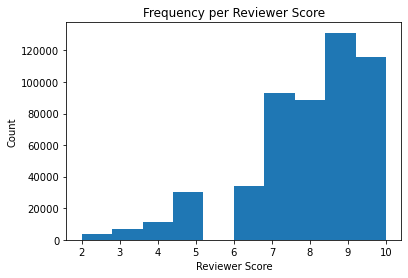

In [10]:
#histogram
plt.figure()
plt.hist(df['Reviewer_Score'])
plt.ylabel("Count")
plt.xlabel("Reviewer Score")
plt.title("Frequency per Reviewer Score")
plt.show()

Rather than normally distributed, `Reviewer_Score` skew high, with significantly more highly scored reviewers compared to significantly fewer poorly scored reviewers. Given that we are building a classification model, we may struggle to train our data on poorly rated viewers given their numerical paucity. Some strategic sampling may be required to ensure we have a representative dataset.

Given that we will be using classification algorithms, it is worth investigating if there are additional columns to be transformed from their current status as categorical data into numerical. Data currently stored as non-numerical data include:
 - `Hotel_Address` - Potentially turn into dummy based on country (?) Also have lat/lon
 - `Review_Date` - Datetime
 - `Hotel_Name` - Could dummy
 - `Reviewer_Nationality` - Could dummy, 227 different nationalities. 
 - `Negative_Review` - Text, will remain until using NLP
 - `Positive_Review` - Text, will remain until using NLP
 - `Tags` - Text, potentially separate out the columns by distinct categories and then use dummy columns (see below)
 - `days_since_review` - convert to integer
    

#### Days since review to numerical data

In [11]:
# Convert days since review from string to numerical data

#Extract the number from days since review

df['days_since_review'] = df['days_since_review'].str.extract('(\d+)')

#Cast as integer

df['days_since_review'] = df['days_since_review'].astype(int)

#### Date to date-time
Cast Date from string to datetime. Hard to do a model that uses date-time straight up. Could do a bit of exploratory analysis to see if there are patterns in the data.

In [12]:
#Cast
df['Review_Date'] = pd.to_datetime(df['Review_Date'])


#### Figuring out a strategy in how to turn 'tags' data into numerical

The tags column is a list of strings, with each particular tag separated by a comma delimiter. Splitting out the string along the comma delimiter can create individual columns for each tag. Tags, however, are organized by different categories with a range of responses to each particular question. Not every reviewers fills in every category, but a total of six categories exist. From what I can deduce, they include:
 - Type of Trip: 'Leisure Trip', 'Business Trip'
     - Create dummy values for: 'Leisure Trip', 'Business Trip'
 - Traveler Unit: 'Couple', 'Solo Traveler', 'Group', 'Family with young children', 'With a pet', 'Family with older children', 'Travelers with friends'. 
     - Create dummy values for: 'Solo', 'Couple', 'Group', 'Family', 'With Pet'
 - Room Type: 'Duplex Double Room', 'Suite', 'Duplex Twin Room', 'Large King Room', '2 rooms', 'Standard Triple Room'...Way too many room options
     - Too many room options, will not include in analysis
 - Duration of Stay: How long they stayed, in the format 'Stayed 'n' nights'
     - Can turn into an integer
 - Submission: 'Submitted from a mobile device' or none
     - turn into binary

In [13]:
#Split out the tags for easier analysis
df_1 = pd.concat([df, df['Tags'].str.split(', ', expand=True)], axis=1)



In [14]:
#rename columns
df_1 = df_1.rename(columns = {0: 'tag1', 1: 'tag2', 2: 'tag3', 3: 'tag4', 4: 'tag5', 5 : 'tag6'})


In [15]:
# Toggle through tag columns to find unique values, identify which ones for analysis.
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

list_unique = df_1['tag5'].unique()
list_unique

array([None, "' Submitted from a mobile device ']", "' Stayed 1 night '",
       "' Stayed 3 nights '", "' Stayed 4 nights '",
       "' Stayed 2 nights ']", "' Stayed 2 nights '",
       "' Stayed 3 nights ']", "' Stayed 4 nights ']",
       "' Stayed 1 night ']", "' Stayed 5 nights ']",
       "' Stayed 7 nights ']", "' Stayed 5 nights '",
       "' Stayed 6 nights '", "' Stayed 9 nights '",
       "' Stayed 7 nights '", "' Stayed 11 nights '",
       "' Stayed 6 nights ']", "' Stayed 8 nights '",
       "' Stayed 10 nights '", "' Stayed 14 nights ']",
       "' Stayed 18 nights '", "' Stayed 9 nights ']",
       "' Stayed 20 nights '", "' Stayed 14 nights '"], dtype=object)

In [16]:
# desired output is a new column with a 1 if 'Business trip' exists in 'tag1'- 'tag6' columns
df_1['Business_trip'] = np.where(df_1['Tags'].str.contains(r'\bBusiness trip\b'), 1, 0)


In [17]:
# desired output is a new column with a 1 if 'Leisure trip' exists in 'tag1'- 'tag6' columns
df_1['Leisure_trip'] = np.where(df_1['Tags'].str.contains(r'\bLeisure trip\b'), 1, 0)

In [18]:
# desired output is a new column with a 1 if 'Solo Traveler' exists in tags columns
df_1['solo_traveler'] = np.where(df_1['Tags'].str.contains(r'\bSolo traveler\b'), 1, 0)


In [19]:
# desired output is a new column with a 1 if 'Couple' exists in tags columns
df_1['couple'] = np.where(df_1['Tags'].str.contains(r'\bCouple\b'), 1, 0)


In [20]:
# desired output is a new column with a 1 if 'Family' exists in tags columns (both family with young and old children)
df_1['family'] = np.where(df_1['Tags'].str.contains(r'\bFamily\b'), 1, 0)


In [21]:
# desired output is a new column with a 1 if 'Group' or 'Travelers with Friends' exists in tags columns
group_friends = [r'\bGroup\b', 'Travelers with friends']

df_1['friend_group'] = np.where(df_1['Tags'].str.contains('|'.join(group_friends)), 1, 0)


In [22]:
# pet owner
df_1['pet_owner'] = np.where(df_1['Tags'].str.contains(r'\bWith a pet\b'), 1, 0)


In [23]:
# Mobile Submission
df_1['mobilesubmission'] = np.where(df_1['Tags'].str.contains(r'\bSubmitted from a mobile device\b'), 1, 0)

In [24]:
# Extract stayed x, to only extract stayed x days (rather than 2 bedrooms)
df_1['length_stay'] = df_1['Tags'].str.extract(pat = '(Stayed \d+)').fillna('0')

# Extract just the number 
df_1['length_stay'] = df_1['length_stay'].str.extract('(\d+)')

# Cast to integer
df_1['length_stay'] = df_1['length_stay'].astype(int)

In [25]:
df_1.drop(columns = ['Tags', 'tag1', 'tag2', 'tag3', 'tag4', 'tag5', 'tag6'], inplace = True)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 25 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   Hotel_Address                               515738 non-null  object        
 1   Additional_Number_of_Scoring                515738 non-null  int64         
 2   Review_Date                                 515738 non-null  datetime64[ns]
 3   Average_Score                               515738 non-null  float64       
 4   Hotel_Name                                  515738 non-null  object        
 5   Reviewer_Nationality                        515738 non-null  object        
 6   Negative_Review                             515738 non-null  object        
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64         
 8   Total_Number_of_Reviews                     515738 non-null  int64        

### Lat Lon Nulls
Lat/Lon Nulls

In [26]:
null_latlong = df_1.isnull().sum()
null_latlong

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
days_since_review                                0
lat                                           3268
lng                                           3268
Business_trip                                    0
Leisure_trip                                     0
solo_traveler                                    0
couple                         

In [27]:
# Nulls as percentage of database. Only .63% of the total database. Probably will drop, but will explore real quick.
3268/len(df_1)*100

0.6336550729246245

In [28]:
null_rows = df_1[df_1.isna().any(axis = 1)]

In [29]:
null_rows.groupby(['Hotel_Name']).mean()

Additional_Number_of_Scoring  \
Hotel_Name                                                                       
Austria Trend Hotel Schloss Wilhelminenberg Wien                          86.0   
City Hotel Deutschmeister                                                 44.0   
Cordial Theaterhotel Wien                                                 39.0   
Derag Livinghotel Kaiser Franz Joseph Vienna                             115.0   
Fleming s Selection Hotel Wien City                                      333.0   
Holiday Inn Paris Montmartre                                              21.0   
Hotel Advance                                                             18.0   
Hotel Atlanta                                                            214.0   
Hotel City Central                                                       211.0   
Hotel Daniel Vienna                                                      101.0   
Hotel Park Villa                                                          37.0   
Hotel Pension Baron am Schottentor                                       122.0   
Maison Albar Hotel Paris Op ra Diamond                                   172.0   
Mercure Paris Gare Montparnasse                                           22.0   
NH Collection Barcelona Podium                                            96.0   
Renaissance Barcelona Hotel                                               20.0   
Roomz Vienna                                                              36.0   

                                                  Average_Score  \
Hotel_Name                                                        
Austria Trend Hotel Schloss Wilhelminenberg Wien            8.3   
City Hotel Deutschmeister                                   8.0   
Cordial Theaterhotel Wien                                   8.4   
Derag Livinghotel Kaiser Franz Joseph Vienna                8.0   
Fleming s Selection Hotel Wien City                         8.3   
Holiday Inn Paris Montmartre                                8.3   
Hotel Advance                                               8.3   
Hotel Atlanta                                               7.8   
Hotel City Central                                          8.6   
Hotel Daniel Vienna                                         8.5   
Hotel Park Villa                                            8.6   
Hotel Pension Baron am Schottentor                          8.0   
Maison Albar Hotel Paris Op ra Diamond                      8.8   
Mercure Paris Gare Montparnasse                             7.8   
NH Collection Barcelona Podium                              8.9   
Renaissance Barcelona Hotel                                 7.6   
Roomz Vienna                                                8.1   

                                                  Review_Total_Negative_Word_Counts  \
Hotel_Name                                                                            
Austria Trend Hotel Schloss Wilhelminenberg Wien                          21.659794   
City Hotel Deutschmeister                                                 18.204301   
Cordial Theaterhotel Wien                                                 20.333333   
Derag Livinghotel Kaiser Franz Joseph Vienna                              19.142857   
Fleming s Selection Hotel Wien City                                       22.800912   
Holiday Inn Paris Montmartre                                              14.709091   
Hotel Advance                                                             11.892857   
Hotel Atlanta                                                             18.760925   
Hotel City Central                                                        12.076377   
Hotel Daniel Vienna                                                       22.685714   
Hotel Park Villa                                                          13.721311   
Hotel Pension Baron am Schottentor                                        17.349776   

In [30]:
# Does each hotel row contain only nulls?
df_1[df_1['Hotel_Name']== 'Renaissance Barcelona Hotel']

Hotel_Address  \
401983  Pau Clar s 122 Eixample 08009 Barcelona Spain   
401984  Pau Clar s 122 Eixample 08009 Barcelona Spain   
401985  Pau Clar s 122 Eixample 08009 Barcelona Spain   
401986  Pau Clar s 122 Eixample 08009 Barcelona Spain   
401987  Pau Clar s 122 Eixample 08009 Barcelona Spain   
401988  Pau Clar s 122 Eixample 08009 Barcelona Spain   
401989  Pau Clar s 122 Eixample 08009 Barcelona Spain   
401990  Pau Clar s 122 Eixample 08009 Barcelona Spain   
401991  Pau Clar s 122 Eixample 08009 Barcelona Spain   
401992  Pau Clar s 122 Eixample 08009 Barcelona Spain   
401993  Pau Clar s 122 Eixample 08009 Barcelona Spain   
401994  Pau Clar s 122 Eixample 08009 Barcelona Spain   
401995  Pau Clar s 122 Eixample 08009 Barcelona Spain   
401996  Pau Clar s 122 Eixample 08009 Barcelona Spain   
401997  Pau Clar s 122 Eixample 08009 Barcelona Spain   
401998  Pau Clar s 122 Eixample 08009 Barcelona Spain   
401999  Pau Clar s 122 Eixample 08009 Barcelona Spain   
402000  Pau Clar s 122 Eixample 08009 Barcelona Spain   
402001  Pau Clar s 122 Eixample 08009 Barcelona Spain   
402002  Pau Clar s 122 Eixample 08009 Barcelona Spain   
402003  Pau Clar s 122 Eixample 08009 Barcelona Spain   
402004  Pau Clar s 122 Eixample 08009 Barcelona Spain   
402005  Pau Clar s 122 Eixample 08009 Barcelona Spain   
402006  Pau Clar s 122 Eixample 08009 Barcelona Spain   
402007  Pau Clar s 122 Eixample 08009 Barcelona Spain   
402008  Pau Clar s 122 Eixample 08009 Barcelona Spain   
402009  Pau Clar s 122 Eixample 08009 Barcelona Spain   
402010  Pau Clar s 122 Eixample 08009 Barcelona Spain   
402011  Pau Clar s 122 Eixample 08009 Barcelona Spain   
402012  Pau Clar s 122 Eixample 08009 Barcelona Spain   
402013  Pau Clar s 122 Eixample 08009 Barcelona Spain   
402014  Pau Clar s 122 Eixample 08009 Barcelona Spain   
402015  Pau Clar s 122 Eixample 08009 Barcelona Spain   

        Additional_Number_of_Scoring Review_Date  Average_Score  \
401983                            20  2017-03-12            7.6   
401984                            20  2017-01-15            7.6   
401985                            20  2016-07-14            7.6   
401986                            20  2016-05-29            7.6   
401987                            20  2016-05-20            7.6   
401988                            20  2016-05-10            7.6   
401989                            20  2016-01-12            7.6   
401990                            20  2016-01-05            7.6   
401991                            20  2015-12-07            7.6   
401992                            20  2017-07-04            7.6   
401993                            20  2017-06-12            7.6   
401994                            20  2017-05-16            7.6   
401995                            20  2017-01-30            7.6   
401996                            20  2017-01-02            7.6   
401997                            20  2017-01-01            7.6   
401998                            20  2016-12-29            7.6   
401999                            20  2016-11-27            7.6   
402000                            20  2016-11-15            7.6   
402001                            20  2016-07-19            7.6   
402002                            20  2016-06-24            7.6   
402003                            20  2016-06-22            7.6   
402004                            20  2016-05-24            7.6   
402005                            20  2016-05-24            7.6   
402006                            20  2016-04-10            7.6   
402007                            20  2016-03-15            7.6   
402008                            20  2016-03-05            7.6   
402009                            20  2016-01-05            7.6   
402010                            20  2016-01-04            7.6   
402011                            20  2016-01-04            7.6   
402012                            20  2015-11-17            7.6   
402013                  

There is no real geographic trend here, will drop nulls.

In [31]:
# Drop
df_1 = df_1.dropna(how = 'any', axis=0)

In [32]:
df_1.isnull().values.any()

False

### Hotel Address

Will see if its worth splitting hotel address string to create variable for hotel country, with hotel country perhaps having some influence on reviewer score. I could see a world where people visiting Spain may have a better experience than visiting, say, France.

In [33]:
df_1.head()

Hotel_Address  \
0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
3   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
4   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   

   Additional_Number_of_Scoring Review_Date  Average_Score   Hotel_Name  \
0                           194  2017-08-03            7.7  Hotel Arena   
1                           194  2017-08-03            7.7  Hotel Arena   
2                           194  2017-07-31            7.7  Hotel Arena   
3                           194  2017-07-31            7.7  Hotel Arena   
4                           194  2017-07-24            7.7  Hotel Arena   

  Reviewer_Nationality                                    Negative_Review  \
0              Russia    I am so angry that i made this post available...   
1             Ireland                                         No Negative   
2           Australia    Rooms are nice but for elderly a bit difficul...   
3      United Kingdom    My room was dirty and I was afraid to walk ba...   
4         New Zealand    You When I booked with your company on line y...   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                397                     1403   
1                                  0                     1403   
2                                 42                     1403   
3                                210                     1403   
4                                140                     1403   

                                     Positive_Review  ...       lng  \
0   Only the park outside of the hotel was beauti...  ...  4.915968   
1   No real complaints the hotel was great great ...  ...  4.915968   
2   Location was good and staff were ok It is cut...  ...  4.915968   
3   Great location in nice surroundings the bar a...  ...  4.915968   
4    Amazing location and building Romantic setting   ...  4.915968   

   Business_trip  Leisure_trip  solo_traveler  couple  family  friend_group  \
0              0             1              0       1       0             0   
1              0             1              0       1       0             0   
2              0             1              0       0       1             0   
3              0             1              1       0       0             0   
4              0             1              0       1       0             0   

   pet_owner  mobilesubmission  length_stay  
0          0                 0            6  
1          0                 0            4  
2          0                 1            3  
3          0                 0            3  
4          0                 1            2  

[5 rows x 25 columns]

In [34]:
df_2 = pd.concat([df_1, df_1['Hotel_Address'].str.split(' ', expand=True)], axis=1)
df_2.head()


Hotel_Address  \
0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
3   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
4   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   

   Additional_Number_of_Scoring Review_Date  Average_Score   Hotel_Name  \
0                           194  2017-08-03            7.7  Hotel Arena   
1                           194  2017-08-03            7.7  Hotel Arena   
2                           194  2017-07-31            7.7  Hotel Arena   
3                           194  2017-07-31            7.7  Hotel Arena   
4                           194  2017-07-24            7.7  Hotel Arena   

  Reviewer_Nationality                                    Negative_Review  \
0              Russia    I am so angry that i made this post available...   
1             Ireland                                         No Negative   
2           Australia    Rooms are nice but for elderly a bit difficul...   
3      United Kingdom    My room was dirty and I was afraid to walk ba...   
4         New Zealand    You When I booked with your company on line y...   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                397                     1403   
1                                  0                     1403   
2                                 42                     1403   
3                                210                     1403   
4                                140                     1403   

                                     Positive_Review  ...   6          7  \
0   Only the park outside of the hotel was beauti...  ...  AA  Amsterdam   
1   No real complaints the hotel was great great ...  ...  AA  Amsterdam   
2   Location was good and staff were ok It is cut...  ...  AA  Amsterdam   
3   Great location in nice surroundings the bar a...  ...  AA  Amsterdam   
4    Amazing location and building Romantic setting   ...  AA  Amsterdam   

             8     9    10    11    12    13    14    15  
0  Netherlands  None  None  None  None  None  None  None  
1  Netherlands  None  None  None  None  None  None  None  
2  Netherlands  None  None  None  None  None  None  None  
3  Netherlands  None  None  None  None  None  None  None  
4  Netherlands  None  None  None  None  None  None  None  

[5 rows x 41 columns]

In [35]:
# cycle through columns 0-15 to identify countries
df_2[15].unique()

array([None, 'France'], dtype=object)

Unique countries include Italy, United Kingdom, Spain, France, Netherlands, and Austria. I think it's worth pulling these out into dummy columns, as they provide different information than just lat/lon. I feel personally that lat/lon are not great indicators. Lon helps us understand if east/west importance, whereas lat helps us understand north/south (as in are more southern locations favored). Country name makes this more explicit. However, I will keep lat/lon and see if the ML models agree with me.

In [36]:
# Binary Netherlands
df_1['Hotel_Netherlands'] = np.where(df_1['Hotel_Address'].str.contains(r'\bNetherlands\b'), 1, 0)


In [37]:
# Binary Italy
df_1['Hotel_Italy'] = np.where(df_1['Hotel_Address'].str.contains(r'\bItaly\b'), 1, 0)


In [38]:
# Binary Austria
df_1['Hotel_Austria'] = np.where(df_1['Hotel_Address'].str.contains(r'\bAustria\b'), 1, 0)


In [39]:
#Binary Spain
df_1['Hotel_Spain'] = np.where(df_1['Hotel_Address'].str.contains(r'\bSpain\b'), 1, 0)


In [40]:
#Binary United Kingdom
df_1['Hotel_United_Kingdom'] = np.where(df_1['Hotel_Address'].str.contains(r'\bUnited.Kingdom\b'), 1, 0)


In [41]:
# Binary France
df_1['Hotel_France'] = np.where(df_1['Hotel_Address'].str.contains(r'\bFrance\b'), 1, 0)


In [42]:
# Assess distribution of hotels by country as percent of total
country_names = ['Hotel_Italy', 'Hotel_United_Kingdom', 'Hotel_Spain', 'Hotel_France', 'Hotel_Netherlands', 'Hotel_Austria']
country_names_percent = df_1[country_names].sum()/len(df_1)
print(country_names_percent)

Hotel_Italy             0.072603
Hotel_United_Kingdom    0.511837
Hotel_Spain             0.116967
Hotel_France            0.116194
Hotel_Netherlands       0.111644
Hotel_Austria           0.070755
dtype: float64


In [43]:
# Assess coverage of country names of total dataset: 100
country_names_percent.sum()

1.0

In [44]:
# drop Hotel_Address columm
df_1 = df_1.drop(columns = ['Hotel_Address'])

In [45]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512470 entries, 0 to 515737
Data columns (total 30 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   Additional_Number_of_Scoring                512470 non-null  int64         
 1   Review_Date                                 512470 non-null  datetime64[ns]
 2   Average_Score                               512470 non-null  float64       
 3   Hotel_Name                                  512470 non-null  object        
 4   Reviewer_Nationality                        512470 non-null  object        
 5   Negative_Review                             512470 non-null  object        
 6   Review_Total_Negative_Word_Counts           512470 non-null  int64         
 7   Total_Number_of_Reviews                     512470 non-null  int64         
 8   Positive_Review                             512470 non-null  object       

### Reviewer Nationality

I will try to use a dummy variable for reviewer nationality


In [46]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate the OneHotEncoder
ohe = OneHotEncoder()

# Fit the OneHotEncoder to the subcategory column and transform
# It expects a 2D array, so we first convert the column into a DataFrame
reviewernationality = pd.DataFrame(df_1['Reviewer_Nationality'])


In [47]:
encoded = ohe.fit_transform(reviewernationality)

In [48]:
# Convert from sparse matrix to dense
dense_array_revnation = encoded.toarray()

In [49]:
ohe.categories_

[array([' ', ' Abkhazia Georgia ', ' Afghanistan ', ' Albania ',
        ' Algeria ', ' American Samoa ', ' Andorra ', ' Angola ',
        ' Anguilla ', ' Antarctica ', ' Antigua Barbuda ', ' Argentina ',
        ' Armenia ', ' Aruba ', ' Australia ', ' Austria ', ' Azerbaijan ',
        ' Bahamas ', ' Bahrain ', ' Bangladesh ', ' Barbados ',
        ' Belarus ', ' Belgium ', ' Belize ', ' Benin ', ' Bermuda ',
        ' Bhutan ', ' Bolivia ', ' Bonaire St Eustatius and Saba ',
        ' Bosnia and Herzegovina ', ' Botswana ', ' Brazil ',
        ' British Virgin Islands ', ' Brunei ', ' Bulgaria ', ' Burundi ',
        ' Cambodia ', ' Cameroon ', ' Canada ', ' Cape Verde ',
        ' Cayman Islands ', ' Central Africa Republic ', ' Chile ',
        ' China ', ' Cocos K I ', ' Colombia ', ' Comoros ', ' Congo ',
        ' Cook Islands ', ' Costa Rica ', ' Crimea ', ' Croatia ',
        ' Cura ao ', ' Cyprus ', ' Czech Republic ',
        ' Democratic Republic of the Congo ', ' Denmark 

In [50]:
revnationality_df = pd.DataFrame(dense_array_revnation, columns=ohe.categories_, dtype = int)

In [51]:
revnationality_df.isnull().values.any()

False

## For the life of me, these won't store as an integer?!

In [52]:
df_1 = pd.concat([df_1, revnationality_df.reindex(df_1.index)], axis=1)

In [53]:
pd.set_option('display.max_columns', None)

df_1.head()

Additional_Number_of_Scoring Review_Date  Average_Score   Hotel_Name  \
0                           194  2017-08-03            7.7  Hotel Arena   
1                           194  2017-08-03            7.7  Hotel Arena   
2                           194  2017-07-31            7.7  Hotel Arena   
3                           194  2017-07-31            7.7  Hotel Arena   
4                           194  2017-07-24            7.7  Hotel Arena   

  Reviewer_Nationality                                    Negative_Review  \
0              Russia    I am so angry that i made this post available...   
1             Ireland                                         No Negative   
2           Australia    Rooms are nice but for elderly a bit difficul...   
3      United Kingdom    My room was dirty and I was afraid to walk ba...   
4         New Zealand    You When I booked with your company on line y...   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                397                     1403   
1                                  0                     1403   
2                                 42                     1403   
3                                210                     1403   
4                                140                     1403   

                                     Positive_Review  \
0   Only the park outside of the hotel was beauti...   
1   No real complaints the hotel was great great ...   
2   Location was good and staff were ok It is cut...   
3   Great location in nice surroundings the bar a...   
4    Amazing location and building Romantic setting    

   Review_Total_Positive_Word_Counts  \
0                                 11   
1                                105   
2                                 21   
3                                 26   
4                                  8   

   Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
0                                           7               2   
1                                           7               7   
2                                           9               7   
3                                           1               3   
4                                           3               6   

   days_since_review        lat       lng  Business_trip  Leisure_trip  \
0                  0  52.360576  4.915968              0             1   
1                  0  52.360576  4.915968              0             1   
2                  3  52.360576  4.915968              0             1   
3                  3  52.360576  4.915968              0             1   
4                 10  52.360576  4.915968              0             1   

   solo_traveler  couple  family  friend_group  pet_owner  mobilesubmission  \
0              0       1       0             0          0                 0   
1              0       1       0             0          0                 0   
2              0       0       1             0          0                 1   
3              1       0       0             0          0                 0   
4              0       1       0             0          0                 1   

   length_stay  Hotel_Netherlands  Hotel_Italy  Hotel_Austria  Hotel_Spain  \
0            6                  1            0              0            0   
1            4                  1            0              0            0   
2            3                  1            0              0            0   
3            3                  1            0              0            0   
4            2                  1            0              0            0   

   Hotel_United_Kingdom  Hotel_France  ( ,)  ( Abkhazia Georgia ,)  \
0                     0             0   0.0                    0.0   
1                     0             0   0.0                    0.0   
2                     0             0   0.0                    0.0   
3                     0             0   0.0                 

In [54]:
# where are these nulls coming from then?
df_1.isnull().sum()

Additional_Number_of_Scoring       0
Review_Date                        0
Average_Score                      0
Hotel_Name                         0
Reviewer_Nationality               0
                                ... 
( Vietnam ,)                    3268
( Wallis and Futuna ,)          3268
( Yemen ,)                      3268
( Zambia ,)                     3268
( Zimbabwe ,)                   3268
Length: 257, dtype: int64

In [55]:
#drop nulls
df_1 = df_1.dropna(how = 'any', axis=0)

In [56]:
df_1.head()

Additional_Number_of_Scoring Review_Date  Average_Score   Hotel_Name  \
0                           194  2017-08-03            7.7  Hotel Arena   
1                           194  2017-08-03            7.7  Hotel Arena   
2                           194  2017-07-31            7.7  Hotel Arena   
3                           194  2017-07-31            7.7  Hotel Arena   
4                           194  2017-07-24            7.7  Hotel Arena   

  Reviewer_Nationality                                    Negative_Review  \
0              Russia    I am so angry that i made this post available...   
1             Ireland                                         No Negative   
2           Australia    Rooms are nice but for elderly a bit difficul...   
3      United Kingdom    My room was dirty and I was afraid to walk ba...   
4         New Zealand    You When I booked with your company on line y...   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                397                     1403   
1                                  0                     1403   
2                                 42                     1403   
3                                210                     1403   
4                                140                     1403   

                                     Positive_Review  \
0   Only the park outside of the hotel was beauti...   
1   No real complaints the hotel was great great ...   
2   Location was good and staff were ok It is cut...   
3   Great location in nice surroundings the bar a...   
4    Amazing location and building Romantic setting    

   Review_Total_Positive_Word_Counts  \
0                                 11   
1                                105   
2                                 21   
3                                 26   
4                                  8   

   Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
0                                           7               2   
1                                           7               7   
2                                           9               7   
3                                           1               3   
4                                           3               6   

   days_since_review        lat       lng  Business_trip  Leisure_trip  \
0                  0  52.360576  4.915968              0             1   
1                  0  52.360576  4.915968              0             1   
2                  3  52.360576  4.915968              0             1   
3                  3  52.360576  4.915968              0             1   
4                 10  52.360576  4.915968              0             1   

   solo_traveler  couple  family  friend_group  pet_owner  mobilesubmission  \
0              0       1       0             0          0                 0   
1              0       1       0             0          0                 0   
2              0       0       1             0          0                 1   
3              1       0       0             0          0                 0   
4              0       1       0             0          0                 1   

   length_stay  Hotel_Netherlands  Hotel_Italy  Hotel_Austria  Hotel_Spain  \
0            6                  1            0              0            0   
1            4                  1            0              0            0   
2            3                  1            0              0            0   
3            3                  1            0              0            0   
4            2                  1            0              0            0   

   Hotel_United_Kingdom  Hotel_France  ( ,)  ( Abkhazia Georgia ,)  \
0                     0             0   0.0                    0.0   
1                     0             0   0.0                    0.0   
2                     0             0   0.0                    0.0   
3                     0             0   0.0                 

In [57]:
# drop Hotel_Address columm
df_1 = df_1.drop(columns = ['Reviewer_Nationality'])

### Sampling the Dataset to Create Dummy Variables for Larger Categories

From here I will create a random sample to minimize computing time. Creating a dense array took too much memory on the full data set. Will select a 10% random sample, and assess if the sample is representative of the broader dataset before continuing forth with dummy variables for Hotel Name, and for the language analysis.



In [58]:
#Sample the DF
df_sample = df_1.sample(frac =.1)


In [59]:
#Sample Shape
print(f'The shape of the sample is: {df_sample.shape[0]} rows and {df_sample.shape[1]} columns')
print(f'The shape of the dataset is: {df_1.shape[0]} rows and {df_1.shape[1]} columns')

The shape of the sample is: 50920 rows and 256 columns
The shape of the dataset is: 509202 rows and 256 columns


In [60]:
# ensure it contains all the reviewerscores
df_sample['Reviewer_Score'].value_counts()

9     13102
10    11487
7      9122
8      8619
6      3358
5      3048
4      1132
3       679
2       373
Name: Reviewer_Score, dtype: int64

In [61]:
df_sample.isnull().sum()

Additional_Number_of_Scoring    0
Review_Date                     0
Average_Score                   0
Hotel_Name                      0
Negative_Review                 0
                               ..
( Vietnam ,)                    0
( Wallis and Futuna ,)          0
( Yemen ,)                      0
( Zambia ,)                     0
( Zimbabwe ,)                   0
Length: 256, dtype: int64

### Hotel Name

In [62]:
#One hot encode hotel name
hotelname = pd.DataFrame(df_sample['Hotel_Name'])
encoded_hotelname = ohe.fit_transform(hotelname)


In [63]:
array_hotelname = encoded_hotelname.toarray()

In [64]:
hotelname_df1 = pd.DataFrame(array_hotelname, columns=ohe.categories_, dtype=int)

In [65]:
hotelname_df1.head()

11 Cadogan Gardens 1K Hotel 25hours Hotel beim MuseumsQuartier 41  \
0                  0        0                                  0  0   
1                  0        0                                  0  0   
2                  0        0                                  0  0   
3                  0        0                                  0  0   
4                  0        0                                  0  0   

  45 Park Lane Dorchester Collection 88 Studios 9Hotel Republique  \
0                                  0          0                 0   
1                                  0          0                 0   
2                                  0          0                 0   
3                                  0          0                 0   
4                                  0          0                 0   

  A La Villa Madame ABaC Restaurant Hotel Barcelona GL Monumento  \
0                 0                                            0   
1                 0                                            0   
2                 0                                            0   
3                 0                                            0   
4                 0                                            0   

  AC Hotel Barcelona Forum a Marriott Lifestyle Hotel  \
0                                                  0    
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

  AC Hotel Diagonal L Illa a Marriott Lifestyle Hotel  \
0                                                  0    
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

  AC Hotel Irla a Marriott Lifestyle Hotel  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

  AC Hotel Milano a Marriott Lifestyle Hotel  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

  AC Hotel Paris Porte Maillot by Marriott  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

  AC Hotel Sants a Marriott Lifestyle Hotel  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

  AC Hotel Victoria Suites a Marriott Lifestyle Hotel ADI Doria Grand Hotel  \
0                                                  0                      0   
1                                                  0                      0   
2                                                  0                      0   
3                                                  0                      0   
4                                                  0                      0   

  ADI Hotel Poliziano Fiera ARCOTEL Kaiserwasser Superior ARCOTEL Wimberger  \
0                         0                             0                 0   
1                         0                             0                 0   
2                         0                             0                 0   
3                         0                             0                 0   
4                         0                             0            

In [66]:
hotelname_df1.isnull().values.any()

False

In [67]:
df_sample.isnull().values.any()

False

In [68]:
df_sample = pd.concat([df_sample, revnationality_df.reindex(df_sample.index)], axis=1)

In [69]:
df_sample.head()

Additional_Number_of_Scoring Review_Date  Average_Score  \
433662                           137  2017-03-21            8.5   
303497                            84  2016-08-22            9.3   
193348                           231  2017-02-02            8.7   
108433                           930  2017-02-27            8.9   
343458                           317  2016-07-17            8.1   

                                     Hotel_Name  \
433662                          H10 Universitat   
303497    Palazzo Parigi Hotel Grand Spa Milano   
193348               Novotel London Blackfriars   
108433    London Marriott Hotel West India Quay   
343458  Arion Cityhotel Vienna und Appartements   

                                          Negative_Review  \
433662   Rooms too small No drawers to put clothes in ...   
303497                                        No Negative   
193348                                            nothing   
108433   The room card reader in the lifts was erratic...   
343458   Bad smell at the room and hotel facilities To...   

        Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
433662                                 35                     1403   
303497                                  0                      534   
193348                                  2                     1362   
108433                                 28                     2836   
343458                                 23                     3887   

                                          Positive_Review  \
433662                      Location staff were fantastic   
303497   Everything is just amazing i can say its the ...   
193348   Everything from the welcome breakfast upgrade...   
108433   All round modern clean fresh building with we...   
343458       Free parking outside Spacious room Low price   

        Review_Total_Positive_Word_Counts  \
433662                                  5   
303497                                 21   
193348                                 19   
108433                                 12   
343458                                  8   

        Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
433662                                           3               7   
303497                                           9              10   
193348                                           6              10   
108433                                           6               8   
343458                                          25               4   

        days_since_review        lat        lng  Business_trip  Leisure_trip  \
433662                135  41.386956   2.166534              0             1   
303497                346  45.473348   9.191073              0             1   
193348                182  51.505017  -0.104983              0             1   
108433                157  51.507271  -0.021121              0             1   
343458                382  48.158533  16.345112              0             1   

        solo_traveler  couple  family  friend_group  pet_owner  \
433662              0       0       1             0          0   
303497              0       0       1             0          0   
193348              0       0       1             0          0   
108433              0       1       0             0          0   
343458              0       0       0             1          0   

        mobilesubmission  length_stay  Hotel_Netherlands  Hotel_Italy  \
433662                 1            3                  0            0   
303497                 1            4                  0            1   
193348                 0            1                  0            0   
108433                 1            2                  0            0   
343458                 1            1                  0            0   

        Hotel_Austria  Hotel_Spain  Hotel_United_Kingdom  Hotel_France  ( ,)  \
433662              0            1                    

In [70]:
#Drop Hotel Name
df_sample = df_sample.drop(columns = ['Hotel_Name'])

### Change Positive and Negative Reviews into binary
Will change positive and negative reviews into binary, and use as test column to make sure the sample is appropriate

In [71]:
df_sample['Reviewer_Score'] = np.where(df_sample['Reviewer_Score'] >= 9, 1, 0)


In [72]:
proportion_positive = df_sample['Reviewer_Score'].sum()/len(df_sample['Reviewer_Score'])
print(proportion_positive)

0.48289473684210527


In [73]:
#Assess if representative
# Proportion of Country
country_names_percent_sample = df_sample[country_names].sum()/len(df_sample)


print(f'Country Proportion Dataset: {country_names_percent}')
print(f'Country Proportion Sample: {country_names_percent_sample}')

Country Proportion Dataset: Hotel_Italy             0.072603
Hotel_United_Kingdom    0.511837
Hotel_Spain             0.116967
Hotel_France            0.116194
Hotel_Netherlands       0.111644
Hotel_Austria           0.070755
dtype: float64
Country Proportion Sample: Hotel_Italy             0.073625
Hotel_United_Kingdom    0.509760
Hotel_Spain             0.118009
Hotel_France            0.116575
Hotel_Netherlands       0.111705
Hotel_Austria           0.070326
dtype: float64


#### Sample Representative? 
The sample seems to closely approximate the total datset using the sample method. Cool!



In [74]:
df_sample.shape

(50920, 482)

In [75]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50920 entries, 433662 to 19829
Columns: 482 entries, Additional_Number_of_Scoring to (' Zimbabwe ',)
dtypes: datetime64[ns](1), float64(230), int32(244), int64(5), object(2)
memory usage: 140.2+ MB


### What we've done:
So far, we have transformed all relevant columns from object/categorical data into numerical data. We are ready to move to bagofword analysis on our two remaining 'string' object columns - `Positive_Review` and `Negative_Review`

## Part 3: Conduct BagofWords Analysis for positive_review and negative_review



In [76]:
df_sample.reset_index(inplace=True)

In [77]:
df_sample.drop(columns = ['index'], inplace = True)

In [78]:
df_sample.head()

Additional_Number_of_Scoring Review_Date  Average_Score  \
0                           137  2017-03-21            8.5   
1                            84  2016-08-22            9.3   
2                           231  2017-02-02            8.7   
3                           930  2017-02-27            8.9   
4                           317  2016-07-17            8.1   

                                     Negative_Review  \
0   Rooms too small No drawers to put clothes in ...   
1                                        No Negative   
2                                            nothing   
3   The room card reader in the lifts was erratic...   
4   Bad smell at the room and hotel facilities To...   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                 35                     1403   
1                                  0                      534   
2                                  2                     1362   
3                                 28                     2836   
4                                 23                     3887   

                                     Positive_Review  \
0                      Location staff were fantastic   
1   Everything is just amazing i can say its the ...   
2   Everything from the welcome breakfast upgrade...   
3   All round modern clean fresh building with we...   
4       Free parking outside Spacious room Low price   

   Review_Total_Positive_Word_Counts  \
0                                  5   
1                                 21   
2                                 19   
3                                 12   
4                                  8   

   Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
0                                           3               0   
1                                           9               1   
2                                           6               1   
3                                           6               0   
4                                          25               0   

   days_since_review        lat        lng  Business_trip  Leisure_trip  \
0                135  41.386956   2.166534              0             1   
1                346  45.473348   9.191073              0             1   
2                182  51.505017  -0.104983              0             1   
3                157  51.507271  -0.021121              0             1   
4                382  48.158533  16.345112              0             1   

   solo_traveler  couple  family  friend_group  pet_owner  mobilesubmission  \
0              0       0       1             0          0                 1   
1              0       0       1             0          0                 1   
2              0       0       1             0          0                 0   
3              0       1       0             0          0                 1   
4              0       0       0             1          0                 1   

   length_stay  Hotel_Netherlands  Hotel_Italy  Hotel_Austria  Hotel_Spain  \
0            3                  0            0              0            1   
1            4                  0            1              0            0   
2            1                  0            0              0            0   
3            2                  0            0              0            0   
4            1                  0            0              1            0   

   Hotel_United_Kingdom  Hotel_France  ( ,)  ( Abkhazia Georgia ,)  \
0                     0             0   0.0                    0.0   
1                     0             0   0.0                    0.0   
2                     1             0   0.0                    0.0   
3                     1             0   0.0                    0.0   
4                     0             0   0.0                    0.0   

   ( Afghanistan ,)  ( Albania ,)  ( Algeria ,)  ( American Samoa ,)  \
0               0.0           0.0           0

In [79]:
#Create dependent and independent variable
X = df_sample.drop('Reviewer_Score', 1)
y = df_sample['Reviewer_Score']

C:\Users\scox0\AppData\Local\Temp/ipykernel_7708/493984589.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df_sample.drop('Reviewer_Score', 1)


In [80]:
# Split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [81]:
#size of training data
X_train.shape

(38190, 481)

In [82]:
X_train.head()

Additional_Number_of_Scoring Review_Date  Average_Score  \
12928                           436  2017-03-21            8.4   
50175                            91  2016-02-24            8.7   
5941                            918  2016-04-05            8.4   
21588                           995  2016-12-18            8.1   
48713                          2288  2015-09-03            8.1   

                                         Negative_Review  \
12928   I found the beds very hard and the bathroom a...   
50175   There was an odour in the bathroom which disa...   
5941                                         No Negative   
21588   Breakfast expensive so we used coffee shop in...   
48713   No Refrigerator in the room Come on UK Two wo...   

       Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
12928                                 31                     4568   
50175                                 14                     1000   
5941                                   0                     4117   
21588                                 11                     3826   
48713                                 14                     9568   

                                         Positive_Review  \
12928   Good breakfast choices very convenient locati...   
50175                                        No Positive   
5941    It waa my daughter s 18th birthday and the ho...   
21588   Convenient especially for the O2 quiet locati...   
48713                                           Location   

       Review_Total_Positive_Word_Counts  \
12928                                 35   
50175                                  0   
5941                                  29   
21588                                 12   
48713                                  2   

       Total_Number_of_Reviews_Reviewer_Has_Given  days_since_review  \
12928                                           2                135   
50175                                           1                526   
5941                                           25                485   
21588                                          10                228   
48713                                           2                700   

             lat       lng  Business_trip  Leisure_trip  solo_traveler  \
12928  45.476917  9.196665              0             1              0   
50175  48.876885  2.327062              0             1              0   
5941   51.513930 -0.101126              0             1              0   
21588  51.504348 -0.033444              0             1              0   
48713  51.511099 -0.120867              1             0              1   

       couple  family  friend_group  pet_owner  mobilesubmission  length_stay  \
12928       0       0             1          0                 0            2   
50175       1       0             0          0                 1            3   
5941        0       0             1          0                 1            1   
21588       0       1             0          0                 1            1   
48713       0       0             0          0                 0            4   

       Hotel_Netherlands  Hotel_Italy  Hotel_Austria  Hotel_Spain  \
12928                  0            1              0            0   
50175                  0            0              0            0   
5941                   0            0              0            0   
21588                  0            0              0            0   
48713                  0            0              0            0   

       Hotel_United_Kingdom  Hotel_France  ( ,)  ( Abkhazia Georgia ,)  \
12928                     0             0   0.0                    0.0   
50175                     0             1   0.0                    0.0   
5941                      1             0   0.0                    0.0   
21588                     1             0   0.0                    0.0   
48713                     1             0   0.0           

#### Work flow:
    1) Create a tokenizer model function
    2) Tinker with min_df function
    3) Instantiate model
    4) Fit to 'Negative Reviews' train and test data
    5) Visualize popular words and n-grams
    6) Create a dataframe object to later append back to remaining numerical data
    7) Fit to 'Positive Reviews' train and test data
    8) Visualize popular words and n-grams
    9) Create a dataframe object to later append back to remaining numerical data
    10) Append the dataframes to other numerical dataframe

In [83]:
# Import nltk, string, and stemmer
import nltk
import string

stemmer = nltk.stem.PorterStemmer()


In [84]:
#Import function for plotting most frequently used words
def plot_most_frequent(words, word_counts, top=20):
    words_df = pd.DataFrame({"token": words, 
                             "count": word_counts})
    
    fig, ax = plt.subplots(figsize=(0.75*top, 5))
    words_df.sort_values(by="count", ascending=False).head(top)\
        .set_index("token")\
        .plot(kind="bar", rot=45, ax=ax)
    sns.despine()
    plt.title("Most frequent tokens")
    plt.show()

In [85]:
# Define a tokenizer function that removes punctuation, splits sentences, removes stopwards, stems words, and deletes empty strings
# Source of function: Brainstation

nltk.download('stopwords')
from nltk.corpus import stopwords 

ENGLISH_STOP_WORDS = stopwords.words('english')

def my_tokenizer(sentence):
    # remove punctuation and set to lower case
    for punctuation_mark in string.punctuation:
        sentence = sentence.replace(punctuation_mark,'').lower()

    # split sentence into words
    listofwords = sentence.split(' ')
    listofstemmed_words = []
    
    # remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in ENGLISH_STOP_WORDS) and (word!=''):
            # Stem words
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\scox0\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [86]:
# Bag of words Instantiate Model
# CountVectorizer with min_df = 25, tokenizer above, an additional stop words filter, and n-gram range for coupled words
bagofwords = CountVectorizer(min_df = 25, 
                             tokenizer=my_tokenizer, 
                             stop_words = 'english',
                             ngram_range=(1,3))

# Fit
bagofwords.fit(X_train['Negative_Review'])

#Transform - vectors of word counts
X_train_neg_transformed = bagofwords.transform(X_train['Negative_Review'])
X_train_neg_transformed.shape

C:\Users\scox0\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
C:\Users\scox0\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'thu', 'togeth', 'twelv', '

(38190, 2170)

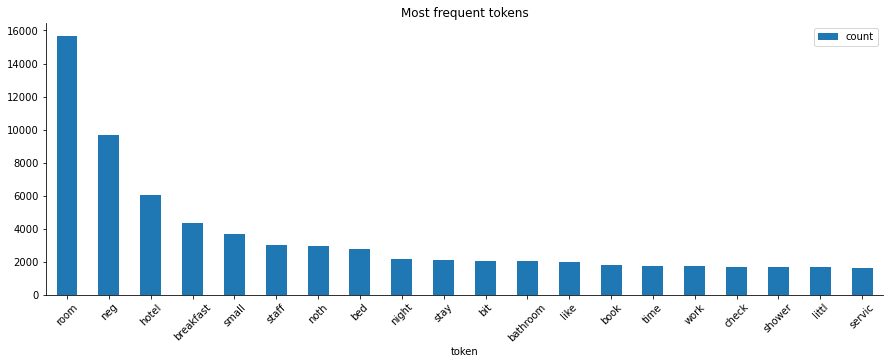

In [87]:
#popular words in 'Negative Review'

words = bagofwords.get_feature_names()
word_counts = X_train_neg_transformed.toarray().sum(axis=0)

plot_most_frequent(words, word_counts)

In [88]:
#filter for popular bigrams: actually quite useful! (ie: room small, room littl, littl bit, room bit, breakfast expens)
count_df = pd.DataFrame({'token': words, 'counts': word_counts})

count_df[count_df['token'].str.split(' ').apply(len) == 2].sort_values('counts', ascending=False).head(20)

token  counts
1646        room small     985
1794        small room     550
1638       room servic     494
122         air condit     490
1877        star hotel     418
68              4 star     343
308           book com     326
1571          room bit     316
1940         tea coffe     307
1610        room littl     276
1578        room clean     273
1181          mini bar     249
337   breakfast includ     235
624          doubl bed     225
1075         littl bit     215
295          bit small     211
947         hotel room     203
333   breakfast expens     194
381           car park     191
2064        valu money     190

In [89]:
# Create df object
X_train_neg_dense = X_train_neg_transformed.toarray()
X_train_neg_df = pd.DataFrame(X_train_neg_dense, columns=bagofwords.get_feature_names(), dtype = int)
X_train_neg_df.head()

00  1  1 2  1 hour  1 night  10  10 min  10 minut  100  11  11am  11pm  12  \
0   0  0    0       0        0   0       0         0    0   0     0     0   0   
1   0  0    0       0        0   0       0         0    0   0     0     0   0   
2   0  0    0       0        0   0       0         0    0   0     0     0   0   
3   0  0    0       0        0   0       0         0    0   0     0     0   0   
4   0  0    0       0        0   0       0         0    0   0     0     0   0   

   13  14  15  15 min  15 minut  150  16  17  18  19  1st  2  2 3  2 day  \
0   0   0   0       0         0    0   0   0   0   0    0  0    0      0   
1   0   0   0       0         0    0   0   0   0   0    0  0    0      0   
2   0   0   0       0         0    0   0   0   0   0    0  0    0      0   
3   0   0   0       0         0    0   0   0   0   0    0  0    0      0   
4   0   0   0       0         0    0   0   0   0   0    0  0    0      0   

   2 hour  2 night  2 peopl  2 room  2 singl  2 singl bed  2 star  20  20 min  \
0       0        0        0       0        0            0       0   0       0   
1       0        0        0       0        0            0       0   0       0   
2       0        0        0       0        0            0       0   0       0   
3       0        0        0       0        0            0       0   0       0   
4       0        0        0       0        0            0       0   0       0   

   20 minut  200  21  22  23  24  24 hour  25  2nd  2nd floor  2pm  3  3 4  \
0         0    0   0   0   0   0        0   0    0          0    0  0    0   
1         0    0   0   0   0   0        0   0    0          0    0  0    0   
2         0    0   0   0   0   0        0   0    0          0    0  0    0   
3         0    0   0   0   0   0        0   0    0          0    0  0    0   
4         0    0   0   0   0   0        0   0    0          0    0  0    0   

   3 day  3 night  3 star  3 star hotel  3 time  30  30 min  30 minut  30 pm  \
0      0        0       0             0       0   0       0         0      0   
1      0        0       0             0       0   0       0         0      0   
2      0        0       0             0       0   0       0         0      0   
3      0        0       0             0       0   0       0         0      0   
4      0        0       0             0       0   0       0         0      0   

   30am  30pm  35  3pm  3rd  3rd floor  4  4 day  4 hotel  4 night  4 star  \
0     0     0   0    0    0          0  0      0        0        0       0   
1     0     0   0    0    0          0  0      0        0        0       0   
2     0     0   0    0    0          0  0      0        0        0       0   
3     0     0   0    0    0          0  0      0        0        0       0   
4     0     0   0    0    0          0  0      0        0        0       0   

   4 star hotel  40  45  4th  4th floor  5  5 minut  5 star  5 star hotel  50  \
0             0   0   0    0          0  0        0       0             0   0   
1             0   0   0    0          0  0        0       0             0   0   
2             0   0   0    0          0  0        0       0             0   0   
3             0   0   0    0          0  0        0       0             0   0   
4             0   0   0    0          0  0        0       0             0   0   

   5th  6  60  6th  7  8  80  8am  9  90  9am  abit  abl  absolut  \
0    0  0   0    0  0  0   0    0  0   0    0     0    0        0   
1    0  0   0    0  0  0   0    0  0   0    0     0    0        0   
2    0  0   0    0  0  0   0    0  0   0    0     0    0        0   
3    0  0   0    0  0  0   0    0  0   0    0     0    0        0   
4    0  0   0    0  0  0   0    0  0   0    0     0    0        0   

   absolut noth  ac  ac work  accept  access  accommod  accord  account  \
0             0   0        0       0       0         0       0        0   
1             0   0        0       0       0         0       0        0   
2             0   0       

In [90]:
#Fit for test negative review
X_test_neg_transformed = bagofwords.transform(X_test['Negative_Review'])
X_test_neg_transformed
X_test_neg_transformed.shape

(12730, 2170)

In [91]:
#Fit for train positive review
bagofwords.fit(X_train['Positive_Review'])

#Transform
X_train_pos_transformed = bagofwords.transform(X_train['Positive_Review'])
X_train_pos_transformed.shape

C:\Users\scox0\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


(38190, 2679)

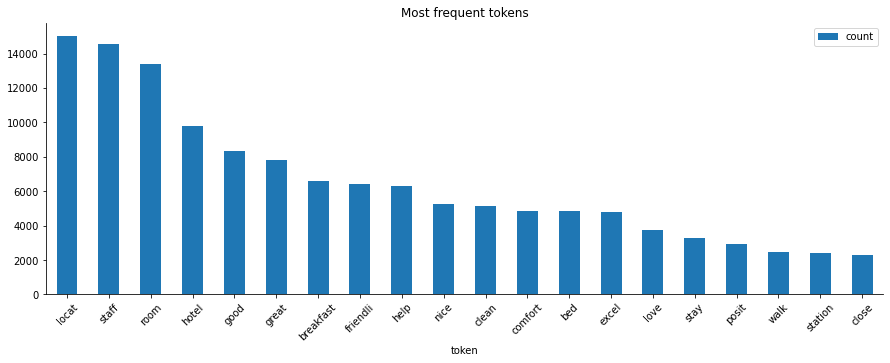

In [92]:
#popular words in 'Positive Review' (Again, seems quite helpful!)
words = bagofwords.get_feature_names()
word_counts = X_train_pos_transformed.toarray().sum(axis=0)

plot_most_frequent(words, word_counts)

In [93]:
#filter for popular 'Positive Review' bigrams: actually quite useful! 
count_df = pd.DataFrame({'token': words, 'counts': word_counts})

count_df[count_df['token'].str.split(' ').apply(len) == 2].sort_values('counts', ascending=False).head(20)

token  counts
1085     great locat    2239
960   friendli staff    1957
2290  staff friendli    1842
943    friendli help    1594
1023      good locat    1484
2309      staff help    1398
1185      help staff    1284
793      excel locat     935
536      comfort bed     929
2022      room clean     896
1449     locat great     774
214      bed comfort     748
1444      locat good     745
316   breakfast good     696
525        comfi bed     688
1008  good breakfast     687
558     comfort room     653
468       clean room     649
1622      minut walk     622
2600    walk distanc     614

In [94]:
#Create dataframe object
X_train_pos_dense = X_train_pos_transformed.toarray()
X_train_pos_df = pd.DataFrame(X_train_pos_dense, columns=bagofwords.get_feature_names(), dtype = int)
X_train_pos_df.head()

00  1  10  10 10  10 15  10 min  10 min walk  10 minut  10 minut walk  100  \
0   0  0   0      0      0       0            0         0              0    0   
1   0  0   0      0      0       0            0         0              0    0   
2   0  0   0      0      0       0            0         0              0    0   
3   0  0   0      0      0       0            0         0              0    0   
4   0  0   0      0      0       0            0         0              0    0   

   10min  11  12  15  15 min  15 min walk  15 minut  15 minut walk  1st  2  \
0      0   0   0   0       0            0         0              0    0  0   
1      0   0   0   0       0            0         0              0    0  0   
2      0   0   0   0       0            0         0              0    0  0   
3      0   0   0   0       0            0         0              0    0  0   
4      0   0   0   0       0            0         0              0    0  0   

   2 min  2 min walk  2 minut  2 minut walk  2 night  20  20 min  20 minut  \
0      0           0        0             0        0   0       0         0   
1      0           0        0             0        0   0       0         0   
2      0           0        0             0        0   0       0         0   
3      0           0        0             0        0   0       0         0   
4      0           0        0             0        0   0       0         0   

   20 minut walk  24  24 hour  25  2nd  3  3 minut  3 minut walk  30  \
0              0   0        0   0    0  1        0             0   0   
1              0   0        0   0    0  0        0             0   0   
2              0   0        0   0    0  0        0             0   0   
3              0   0        0   0    0  0        0             0   0   
4              0   0        0   0    0  0        0             0   0   

   30 minut  4  4 star  4 star hotel  40  5  5 min  5 min walk  5 minut  \
0         0  0       0             0   0  0      0           0        0   
1         0  0       0             0   0  0      0           0        0   
2         0  0       0             0   0  0      0           0        0   
3         0  0       0             0   0  0      0           0        0   
4         0  0       0             0   0  0      0           0        0   

   5 minut walk  5 star  5 star hotel  50  5min  6  7  8  9  abl  absolut  \
0             0       0             0   0     0  0  0  0  0    0        0   
1             0       0             0   0     0  0  0  0  0    0        0   
2             0       0             0   0     0  0  0  0  0    0        0   
3             0       0             0   0     0  0  0  0  0    0        0   
4             0       0             0   0     0  0  0  0  0    0        0   

   absolut amaz  absolut love  ac  accept  access  access citi  access metro  \
0             0             0   0       0       0            0             0   
1             0             0   0       0       0            0             0   
2             0             0   0       0       0            0             0   
3             0             0   0       0       0            0             0   
4             0             0   0       0       0            0             0   

   access public  access tube  accommod  accommod staff  accomod  activ  \
0              0            0         0               0        0      0   
1              0            0         0               0        0      0   
2              0            0         0               0        0      0   
3              0            0         0               0        0      0   
4              0            0         0               0        0      0   

   actual  ad  add  addit  adequ  adult  advanc  advantag  advic  advis  \
0       0   0    0      0      0      0       0         0      0      0   
1       0   0    0      0      0      0       0         0      0      0   
2       0   0    0      0      0      0       0         0      0      0   

In [95]:
#Fit for test positive review
X_test_pos_transformed = bagofwords.transform(X_test['Negative_Review'])
X_test_pos_transformed

<12730x2679 sparse matrix of type '<class 'numpy.int64'>'
	with 83737 stored elements in Compressed Sparse Row format>

In [96]:
df_sample.head()

Additional_Number_of_Scoring Review_Date  Average_Score  \
0                           137  2017-03-21            8.5   
1                            84  2016-08-22            9.3   
2                           231  2017-02-02            8.7   
3                           930  2017-02-27            8.9   
4                           317  2016-07-17            8.1   

                                     Negative_Review  \
0   Rooms too small No drawers to put clothes in ...   
1                                        No Negative   
2                                            nothing   
3   The room card reader in the lifts was erratic...   
4   Bad smell at the room and hotel facilities To...   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                 35                     1403   
1                                  0                      534   
2                                  2                     1362   
3                                 28                     2836   
4                                 23                     3887   

                                     Positive_Review  \
0                      Location staff were fantastic   
1   Everything is just amazing i can say its the ...   
2   Everything from the welcome breakfast upgrade...   
3   All round modern clean fresh building with we...   
4       Free parking outside Spacious room Low price   

   Review_Total_Positive_Word_Counts  \
0                                  5   
1                                 21   
2                                 19   
3                                 12   
4                                  8   

   Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
0                                           3               0   
1                                           9               1   
2                                           6               1   
3                                           6               0   
4                                          25               0   

   days_since_review        lat        lng  Business_trip  Leisure_trip  \
0                135  41.386956   2.166534              0             1   
1                346  45.473348   9.191073              0             1   
2                182  51.505017  -0.104983              0             1   
3                157  51.507271  -0.021121              0             1   
4                382  48.158533  16.345112              0             1   

   solo_traveler  couple  family  friend_group  pet_owner  mobilesubmission  \
0              0       0       1             0          0                 1   
1              0       0       1             0          0                 1   
2              0       0       1             0          0                 0   
3              0       1       0             0          0                 1   
4              0       0       0             1          0                 1   

   length_stay  Hotel_Netherlands  Hotel_Italy  Hotel_Austria  Hotel_Spain  \
0            3                  0            0              0            1   
1            4                  0            1              0            0   
2            1                  0            0              0            0   
3            2                  0            0              0            0   
4            1                  0            0              1            0   

   Hotel_United_Kingdom  Hotel_France  ( ,)  ( Abkhazia Georgia ,)  \
0                     0             0   0.0                    0.0   
1                     0             0   0.0                    0.0   
2                     1             0   0.0                    0.0   
3                     1             0   0.0                    0.0   
4                     0             0   0.0                    0.0   

   ( Afghanistan ,)  ( Albania ,)  ( Algeria ,)  ( American Samoa ,)  \
0               0.0           0.0           0

In [97]:
X_train_pos_df.tail()

00  1  10  10 10  10 15  10 min  10 min walk  10 minut  10 minut walk  \
38185   0  0   0      0      0       0            0         0              0   
38186   0  0   0      0      0       0            0         0              0   
38187   0  0   0      0      0       0            0         0              0   
38188   0  0   0      0      0       0            0         0              0   
38189   0  0   0      0      0       0            0         0              0   

       100  10min  11  12  15  15 min  15 min walk  15 minut  15 minut walk  \
38185    0      0   0   0   0       0            0         0              0   
38186    0      0   0   0   0       0            0         0              0   
38187    0      0   0   0   0       0            0         0              0   
38188    0      0   0   0   0       0            0         0              0   
38189    0      0   0   0   0       0            0         0              0   

       1st  2  2 min  2 min walk  2 minut  2 minut walk  2 night  20  20 min  \
38185    0  0      0           0        0             0        0   0       0   
38186    0  0      0           0        0             0        0   0       0   
38187    0  0      0           0        0             0        0   0       0   
38188    0  0      0           0        0             0        0   0       0   
38189    0  0      0           0        0             0        0   0       0   

       20 minut  20 minut walk  24  24 hour  25  2nd  3  3 minut  \
38185         0              0   0        0   0    0  0        0   
38186         0              0   0        0   0    0  0        0   
38187         0              0   0        0   0    0  0        0   
38188         0              0   0        0   0    0  0        0   
38189         0              0   0        0   0    0  0        0   

       3 minut walk  30  30 minut  4  4 star  4 star hotel  40  5  5 min  \
38185             0   0         0  0       0             0   0  0      0   
38186             0   0         0  0       0             0   0  0      0   
38187             0   0         0  0       0             0   0  0      0   
38188             0   0         0  0       0             0   0  0      0   
38189             0   0         0  0       0             0   0  0      0   

       5 min walk  5 minut  5 minut walk  5 star  5 star hotel  50  5min  6  \
38185           0        0             0       0             0   0     0  0   
38186           0        0             0       0             0   0     0  0   
38187           0        0             0       0             0   0     0  0   
38188           0        0             0       0             0   0     0  0   
38189           0        0             0       0             0   0     0  0   

       7  8  9  abl  absolut  absolut amaz  absolut love  ac  accept  access  \
38185  0  0  0    0        0             0             0   0       0       0   
38186  0  0  0    0        0             0             0   0       0       0   
38187  0  0  0    0        0             0             0   0       0       0   
38188  0  0  0    0        0             0             0   1       0       0   
38189  0  0  0    0        0             0             0   0       0       0   

       access citi  access metro  access public  access tube  accommod  \
38185            0             0              0            0         0   
38186            0             0              0            0         0   
38187            0             0              0            0         0   
38188            0             0              0            0         1   
38189            0             0              0            0         0   

       accommod staff  accomod  activ  actual  ad  add  addit  adequ  adult  \
38185               0        0      0       0   0    0      0      0      0   
38186               0        0      0       0   0    0      0      0      0   
38187               0        0      0       0   0    0      0     

In [98]:
#Combine with numerical data
df_sample2 = pd.concat([df_sample, X_train_pos_df, X_train_neg_df], axis=1)

In [99]:
#completed dataset
df_sample2.head()

Additional_Number_of_Scoring Review_Date  Average_Score  \
0                           137  2017-03-21            8.5   
1                            84  2016-08-22            9.3   
2                           231  2017-02-02            8.7   
3                           930  2017-02-27            8.9   
4                           317  2016-07-17            8.1   

                                     Negative_Review  \
0   Rooms too small No drawers to put clothes in ...   
1                                        No Negative   
2                                            nothing   
3   The room card reader in the lifts was erratic...   
4   Bad smell at the room and hotel facilities To...   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                 35                     1403   
1                                  0                      534   
2                                  2                     1362   
3                                 28                     2836   
4                                 23                     3887   

                                     Positive_Review  \
0                      Location staff were fantastic   
1   Everything is just amazing i can say its the ...   
2   Everything from the welcome breakfast upgrade...   
3   All round modern clean fresh building with we...   
4       Free parking outside Spacious room Low price   

   Review_Total_Positive_Word_Counts  \
0                                  5   
1                                 21   
2                                 19   
3                                 12   
4                                  8   

   Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
0                                           3               0   
1                                           9               1   
2                                           6               1   
3                                           6               0   
4                                          25               0   

   days_since_review        lat        lng  Business_trip  Leisure_trip  \
0                135  41.386956   2.166534              0             1   
1                346  45.473348   9.191073              0             1   
2                182  51.505017  -0.104983              0             1   
3                157  51.507271  -0.021121              0             1   
4                382  48.158533  16.345112              0             1   

   solo_traveler  couple  family  friend_group  pet_owner  mobilesubmission  \
0              0       0       1             0          0                 1   
1              0       0       1             0          0                 1   
2              0       0       1             0          0                 0   
3              0       1       0             0          0                 1   
4              0       0       0             1          0                 1   

   length_stay  Hotel_Netherlands  Hotel_Italy  Hotel_Austria  Hotel_Spain  \
0            3                  0            0              0            1   
1            4                  0            1              0            0   
2            1                  0            0              0            0   
3            2                  0            0              0            0   
4            1                  0            0              1            0   

   Hotel_United_Kingdom  Hotel_France  ( ,)  ( Abkhazia Georgia ,)  \
0                     0             0   0.0                    0.0   
1                     0             0   0.0                    0.0   
2                     1             0   0.0                    0.0   
3                     1             0   0.0                    0.0   
4                     0             0   0.0                    0.0   

   ( Afghanistan ,)  ( Albania ,)  ( Algeria ,)  ( American Samoa ,)  \
0               0.0           0.0           0

In [103]:
df_sample2.shape

(50920, 5331)

In [104]:
pd.set_option('display.max_rows', None)

df_sample2.isnull().sum()

Additional_Number_of_Scoring                      0
Review_Date                                       0
Average_Score                                     0
Negative_Review                                   0
Review_Total_Negative_Word_Counts                 0
Total_Number_of_Reviews                           0
Positive_Review                                   0
Review_Total_Positive_Word_Counts                 0
Total_Number_of_Reviews_Reviewer_Has_Given        0
Reviewer_Score                                    0
days_since_review                                 0
lat                                               0
lng                                               0
Business_trip                                     0
Leisure_trip                                      0
solo_traveler                                     0
couple                                            0
family                                            0
friend_group                                      0
pet_owner   

### Question 3e
Answer to question 3e: the `min_df` parameter within the count vectorizor sets a minimum threshold for number of strings across documents, or in this case, across comments. In other words, with a min_df = 25, as used in this example, a string is only incorporated into the bag of words if it appears in at least 25 comments. More directly from the Brainstation Text_Data notebook, a min_df parameter is used to exclude any token that occurs in less than min_df documents.

## Conclusion
The dataset has been cleaned and prepared for modeling. After exploring the target column - Reviewer Score - we then sought to transform categorical columns into useful numerical columns for modeling. We dropped lat/lon columns without data, pulled out hotels based on their country of location, created dummy variables for reviewer nationality and hotel name, identified relevant information from the tags column, and changed the date variable to a date-time function. With only the reviewer comments columns left - both positive and negative - we cleaned the text data to identify frequent words and combination of words within each comment type. We then pulled together the final sample for analysis.